# Demo

In [ ]:
import keras
keras.__version__

In [1]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(16,8), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [4]:
test_batches.class_indices

{'chopper': 0,
 'clock': 1,
 'frying_pan': 2,
 'knife': 3,
 'massage_chair': 4,
 'microwave': 5,
 'pots': 6,
 'rice_cooker': 7,
 'scissors': 8,
 'stools': 9,
 'swing': 10,
 'wine_cooler': 11,
 'wine_glass': 12}

Found 130 images belonging to 13 classes.
Predict below item is a :  clock


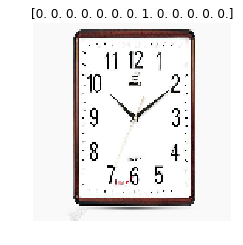

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

test_path = 'dataset/test_set'
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (128, 128), 
                                                         classes=['chopper','clock','frying_pan','knife','massage_chair','microwave',
                                                                  'pots','rice_cooker','scissors','stools','swing','wine_cooler','wine_glass'],
                                                         batch_size = 130)

# dimensions of our images
img_width, img_height = 128, 128

# load the model we saved
model = load_model('cnn_model_weights_700.h5')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# predicting images
img = image.load_img('./dataset/test_set/clock/28004.jpg', target_size=(img_width, img_height))
# img = image.load_img('./dataset/test_set/knife/26244.jpg', target_size=(img_width, img_height))
# img = image.load_img('./dataset/test_set/knife/26244.jpg', target_size=(img_width, img_height))
# img = image.load_img('./dataset/test_set/knife/26244.jpg', target_size=(img_width, img_height))
# img = image.load_img('./dataset/test_set/knife/26244.jpg', target_size=(img_width, img_height))
# img = image.load_img('./dataset/test_set/knife/26244.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)

test_imgs, test_labels = next(test_batches)

plots(images, titles=test_labels)
listclass = list(test_batches.class_indices.keys())
print('Predict below item is a : ', listclass[classes[0]])